In [1]:

from plotnine import (
    ggplot,
    aes,
    geom_point,
    scale_x_datetime,
    labs,
    theme_set,
    theme_linedraw,
)
from plotnine.data import economics

from mizani.breaks import date_breaks
from mizani.formatters import date_format

theme_set(theme_linedraw())  # default theme

In [2]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


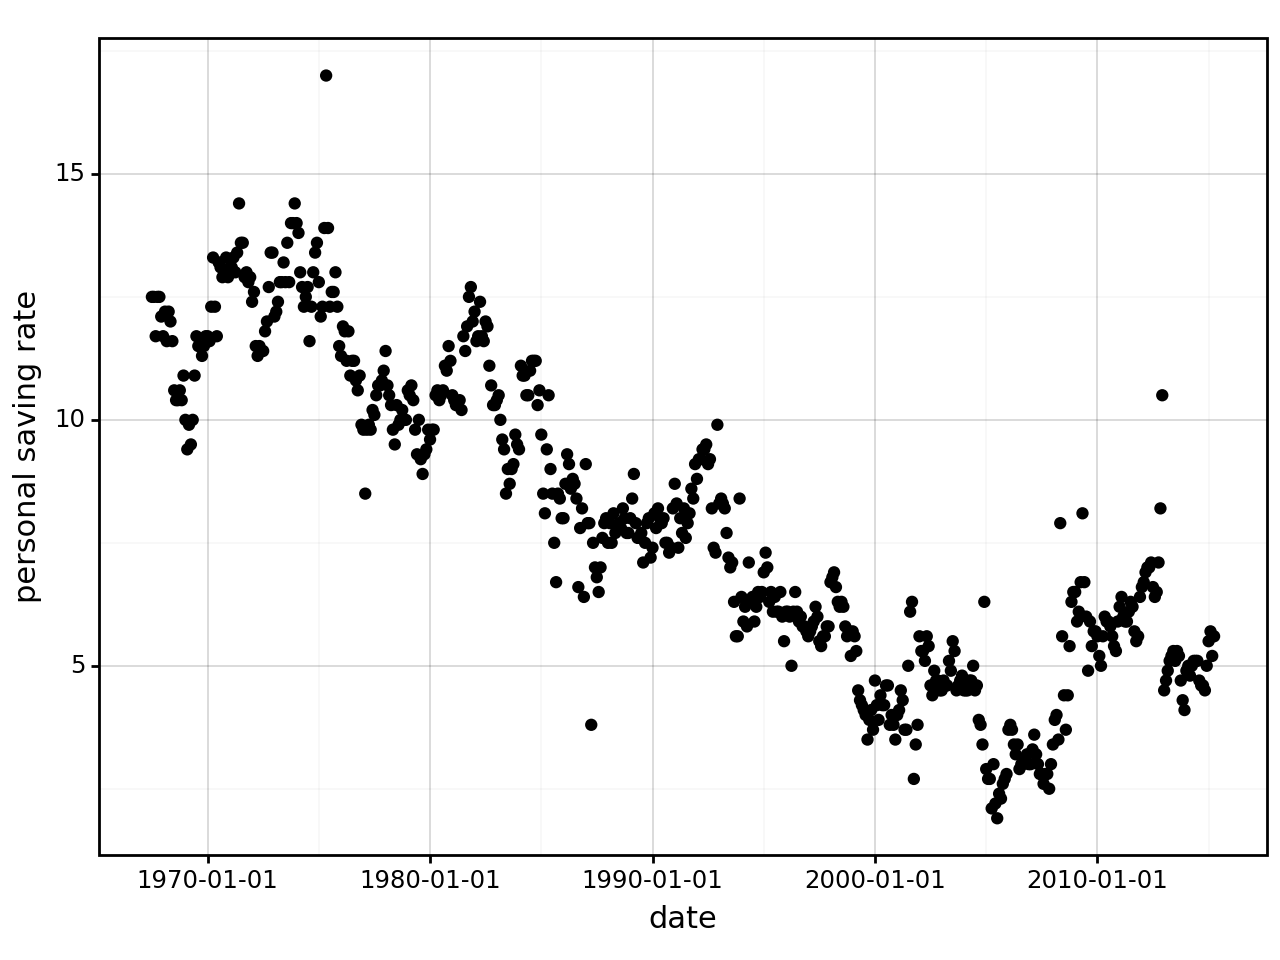

<Figure Size: (640 x 480)>

In [3]:
(
    ggplot(economics)
    + geom_point(aes("date", "psavert"))
    + labs(y="personal saving rate")
)

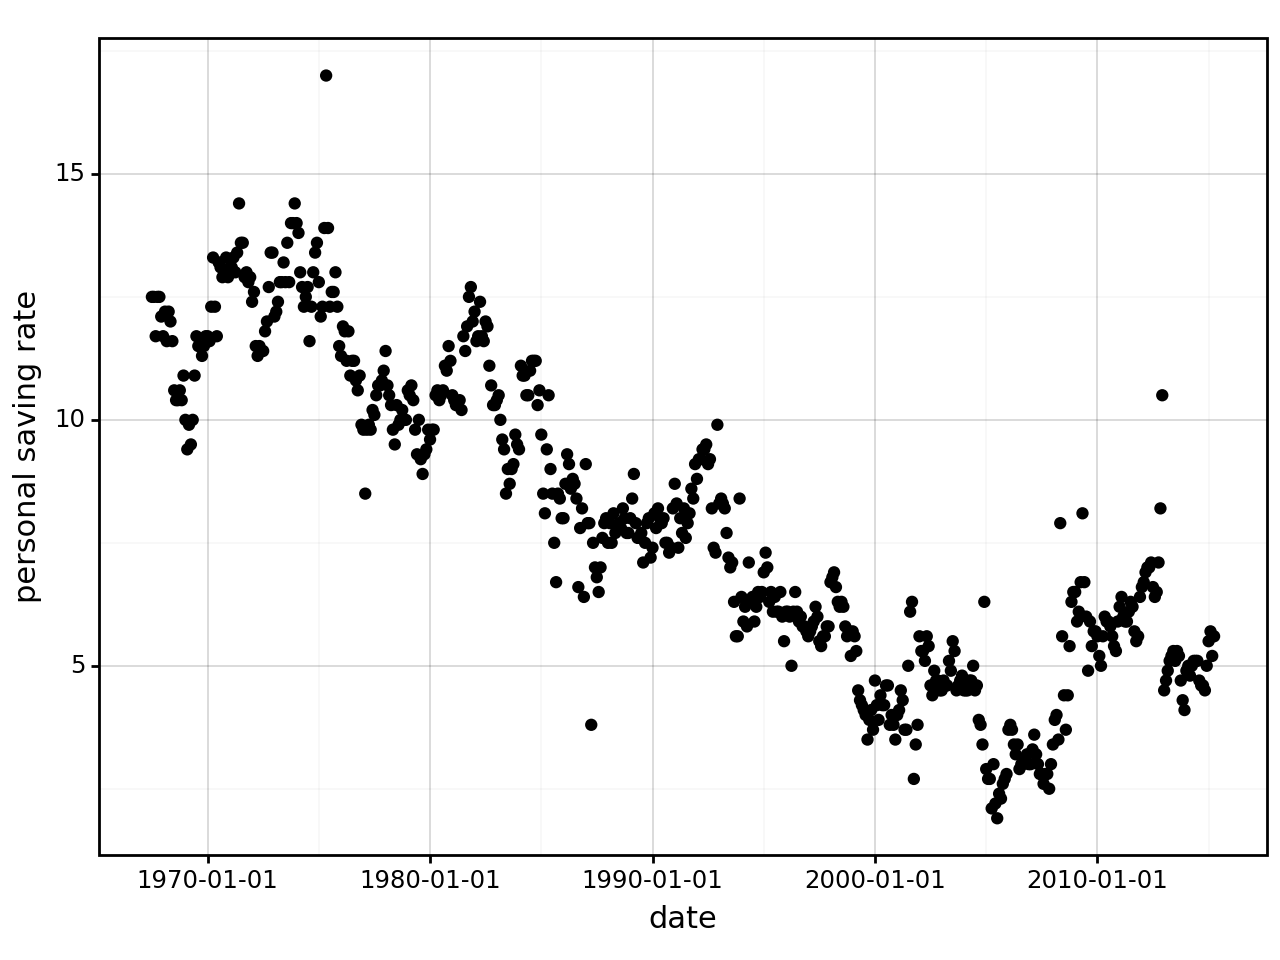

<Figure Size: (640 x 480)>

In [4]:
(
    ggplot(economics)
    + geom_point(aes("date", "psavert"))
    + scale_x_datetime(breaks=date_breaks("10 years"))  # new
    + labs(y="personal saving rate")
)

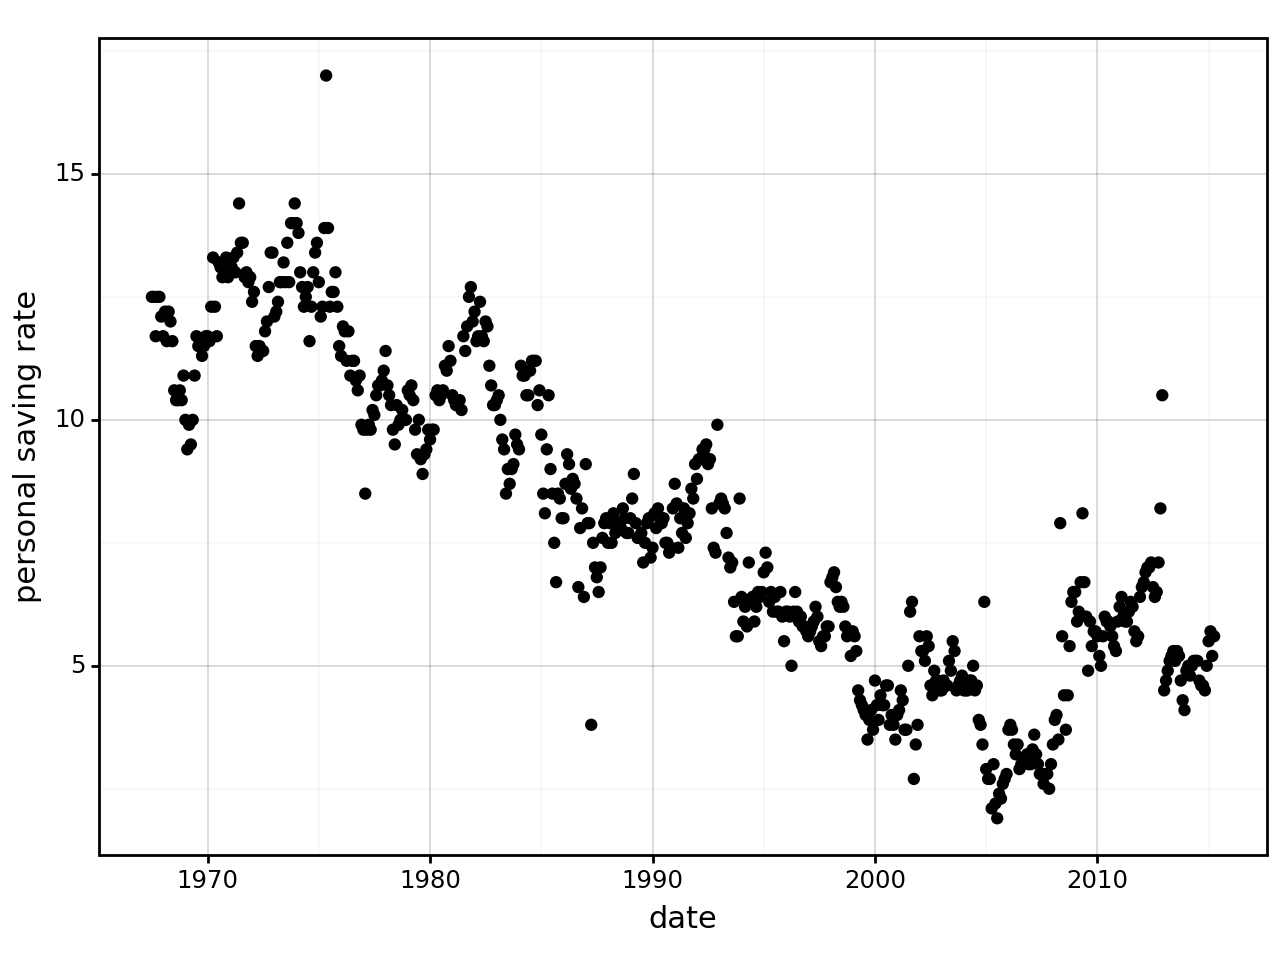

<Figure Size: (640 x 480)>

In [5]:
(
    ggplot(economics)
    + geom_point(aes("date", "psavert"))
    + scale_x_datetime(
        breaks=date_breaks("10 years"), labels=date_format("%Y")
    )  # modified
    + labs(y="personal saving rate")
)

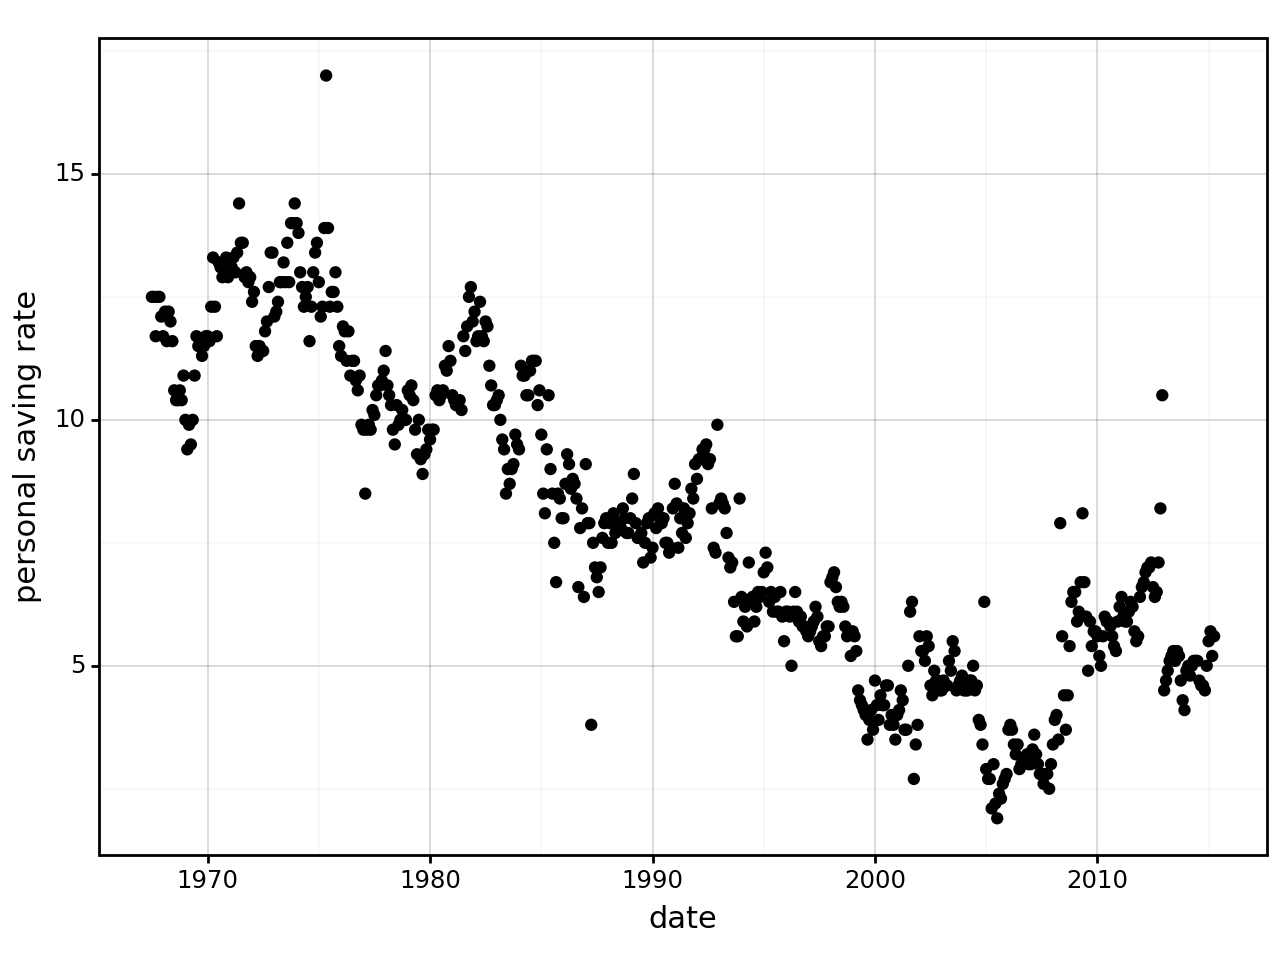

<Figure Size: (640 x 480)>

In [6]:
def custom_date_format1(breaks):
    """
    Function to format the date
    """
    return [x.year if x.month == 1 and x.day == 1 else "" for x in breaks]


(
    ggplot(economics)
    + geom_point(aes("date", "psavert"))
    + scale_x_datetime(  # modified
        breaks=date_breaks("10 years"), labels=custom_date_format1
    )
    + labs(y="personal saving rate")
)

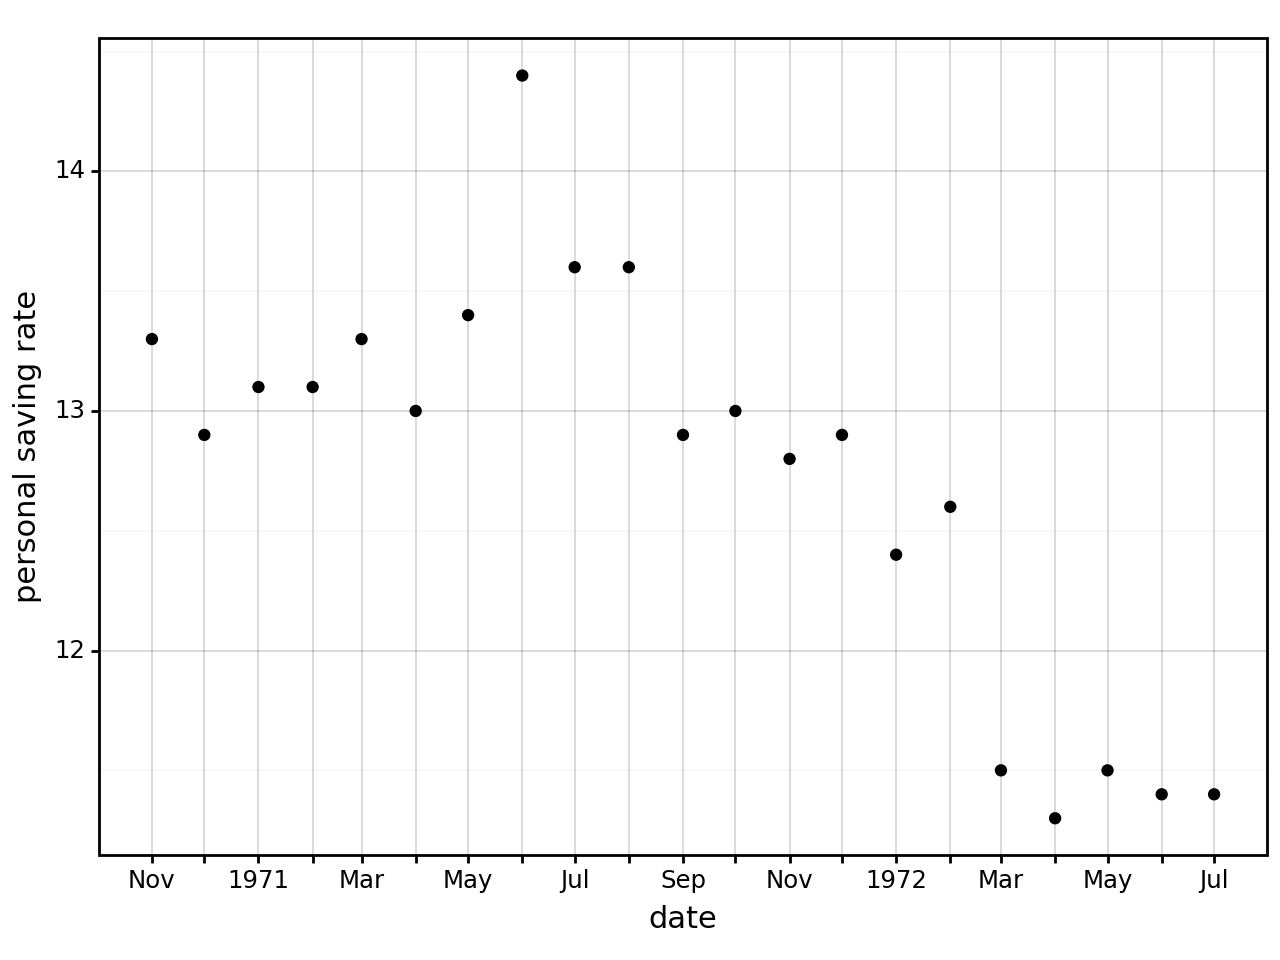

<Figure Size: (640 x 480)>

In [7]:
from datetime import date


def custom_date_format2(breaks):
    """
    Function to format the date
    """
    res = []
    for x in breaks:
        # First day of the year
        if x.month == 1 and x.day == 1:
            fmt = "%Y"
        # Every other month
        elif x.month % 2 != 0:
            fmt = "%b"
        else:
            fmt = ""

        res.append(date.strftime(x, fmt))

    return res


(
    ggplot(economics.loc[40:60, :])  # modified
    + geom_point(aes("date", "psavert"))
    + scale_x_datetime(
        breaks=date_breaks("1 months"), labels=custom_date_format2, minor_breaks=[]
    )
    + labs(y="personal saving rate")
)

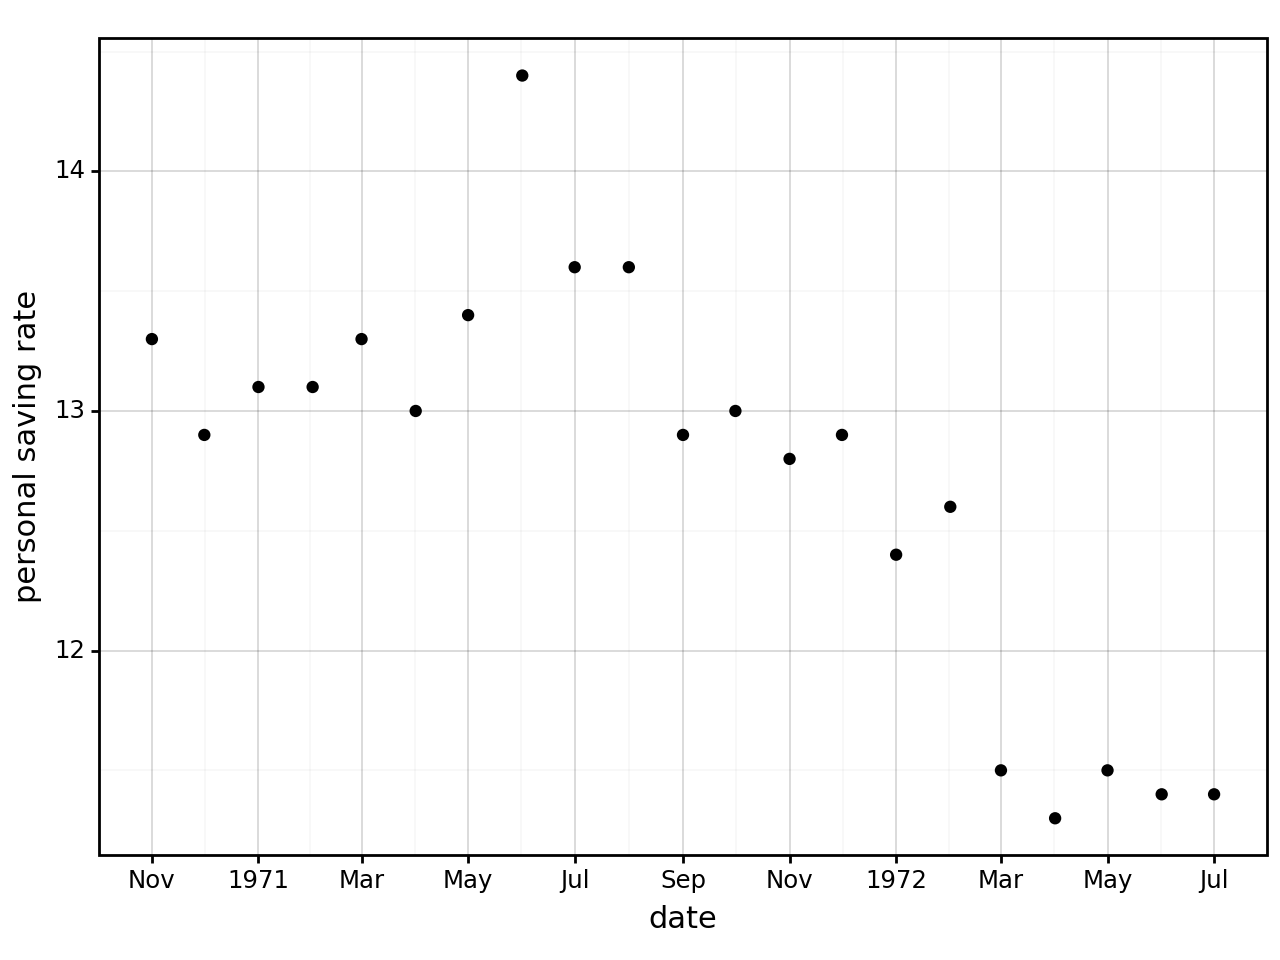

<Figure Size: (640 x 480)>

In [8]:
def custom_date_format3(breaks):
    """
    Function to format the date
    """
    res = []
    for x in breaks:
        # First day of the year
        if x.month == 1:
            fmt = "%Y"
        else:
            fmt = "%b"

        res.append(date.strftime(x, fmt))

    return res


def custom_date_breaks(width=None):
    """
    Create a function that calculates date breaks

    It delegates the work to `date_breaks`
    """

    def filter_func(limits):
        breaks = date_breaks(width)(limits)
        # filter
        return [x for x in breaks if x.month % 2]

    return filter_func


(
    ggplot(economics.loc[40:60, :])
    + geom_point(aes("date", "psavert"))
    + scale_x_datetime(  # modified
        breaks=custom_date_breaks("1 months"), labels=custom_date_format3
    )
    + labs(y="personal saving rate")
)